In [2]:
import numpy as np
import pandas as pd
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats 

In [3]:
df=pd.read_csv('abtest.csv')

In [4]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
df.shape

(100, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.2+ KB


In [8]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [9]:
df.describe(include=[object])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [10]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [11]:
df.duplicated().sum()

0

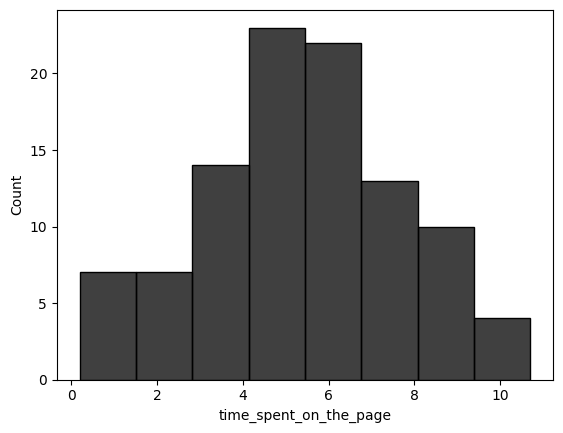

In [12]:
sns.histplot(data=df,x='time_spent_on_the_page',color='k')
plt.show()

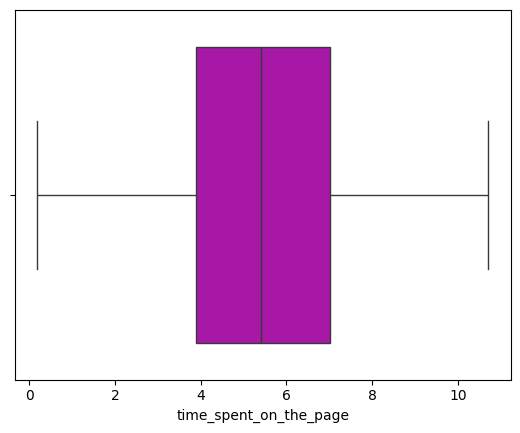

In [13]:
sns.boxplot(data=df,x='time_spent_on_the_page',color='m')
plt.show()

In [14]:
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

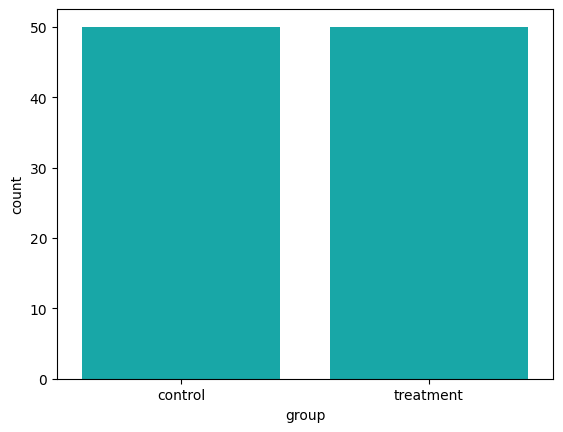

In [15]:
sns.countplot(data=df,x='group',color='c')
plt.show()

In [16]:
df['landing_page'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

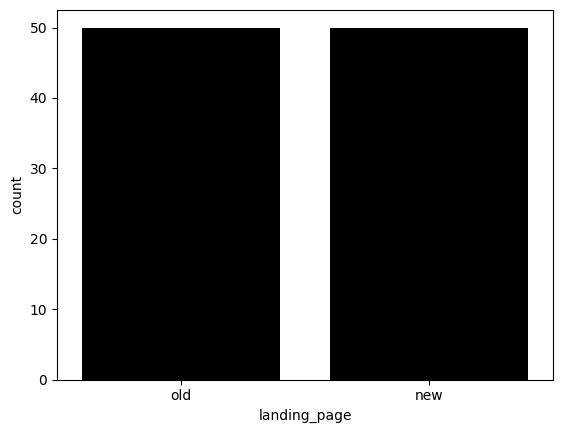

In [17]:
sns.countplot(data=df,x='landing_page',color='k')
plt.show()

In [18]:
df['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

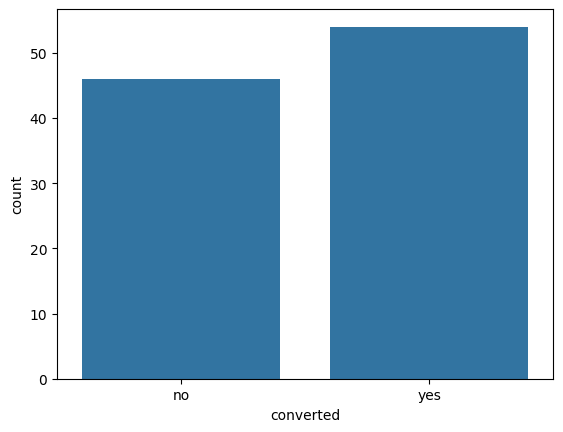

In [19]:
sns.countplot(data=df,x='converted')
plt.show()

In [20]:
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

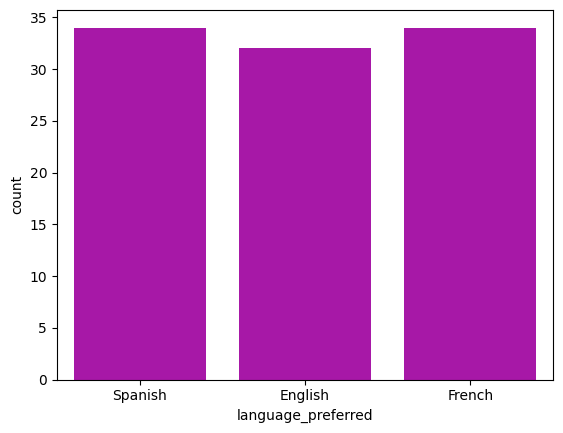

In [21]:
sns.countplot(data=df,x='language_preferred',color='m')
plt.show()

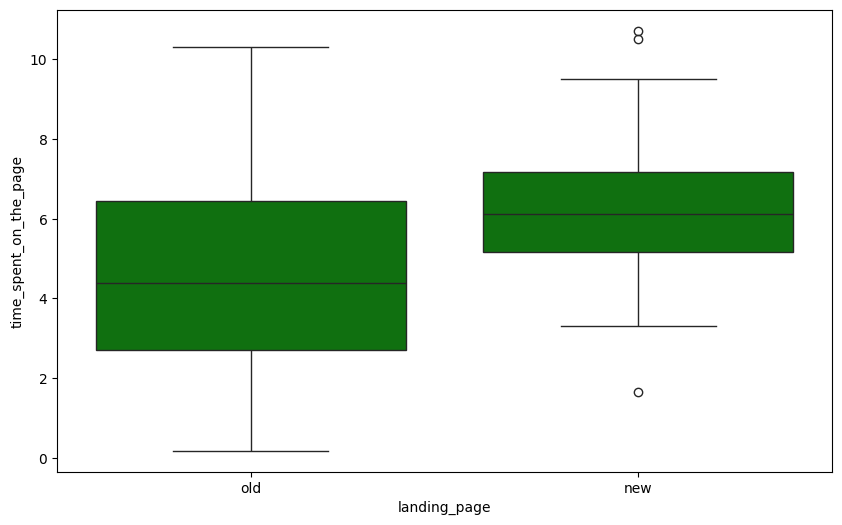

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page',color='g')
plt.show()

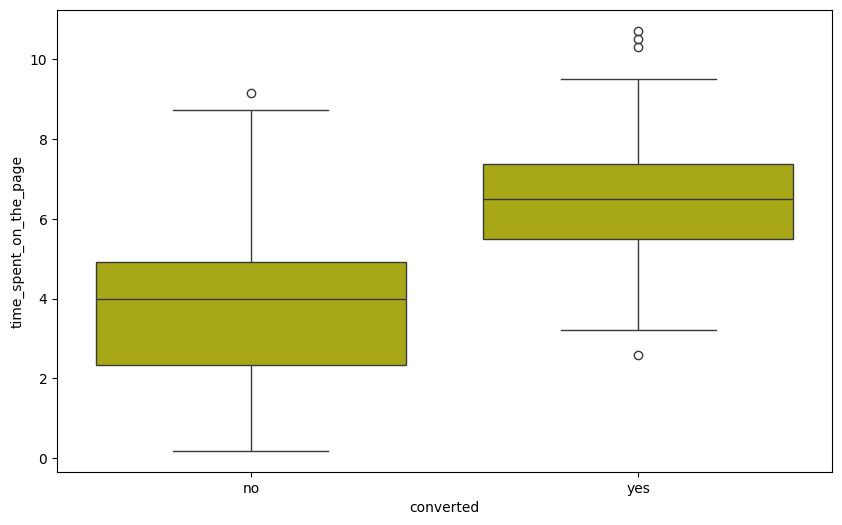

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page',color='y')
plt.show()

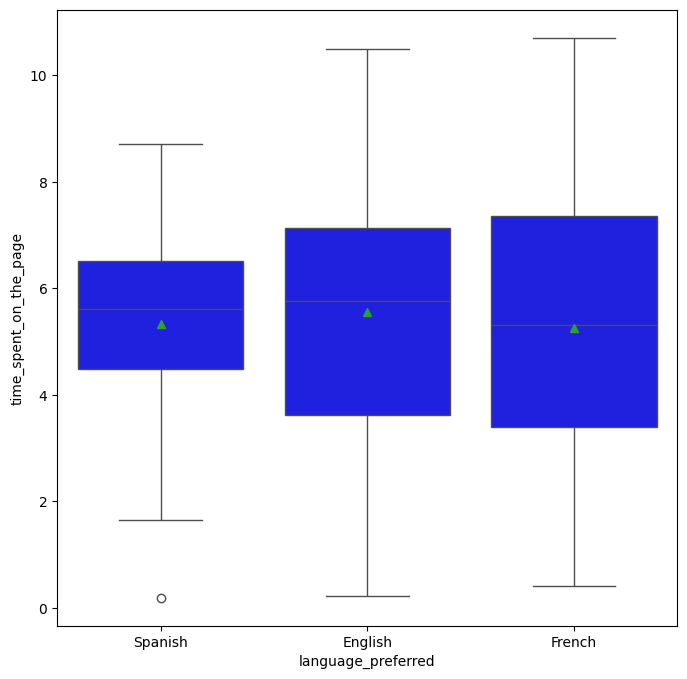

In [24]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page',showmeans=True,color='b')
plt.show()

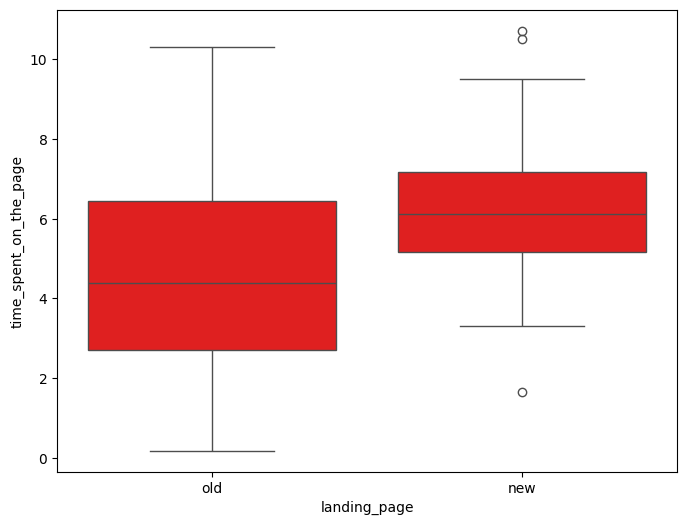

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page',color='r')
plt.show()

In [26]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [27]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


In [28]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


In [29]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


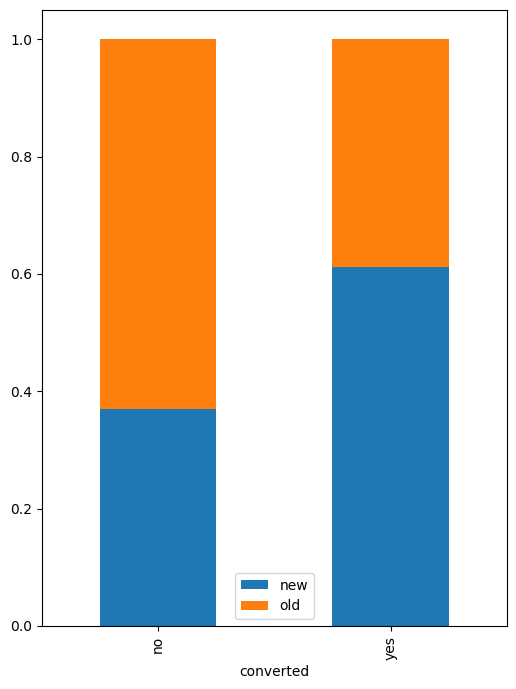

In [34]:
pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True,)
plt.legend()
plt.show()

In [35]:


new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
print('The numbers of converted users for the new and old pages are {0} and {1} respectively'.format(new_converted, old_converted))
n_control = df.group.value_counts()['control'] 
n_treatment = df.group.value_counts()['treatment']
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))



The numbers of converted users for the new and old pages are 33 and 21 respectively
The numbers of users served the new and old pages are 50 and 50 respectively


In [36]:
from statsmodels.stats.proportion import proportions_ztest
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')
print('The p-value is', p_value)

The p-value is 0.008026308204056278


In [37]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
   

 print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')



As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


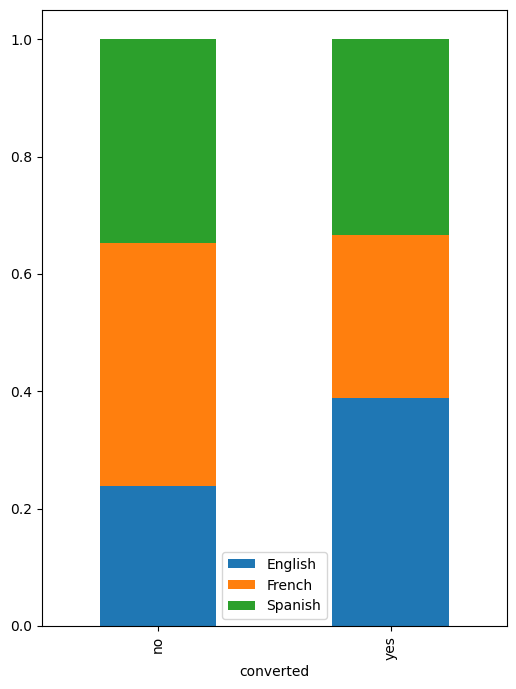

In [38]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8),
                 stacked=True)
plt.legend()
plt.show()



In [39]:
contingency_table=pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [40]:
from scipy.stats import chi2_contingency
chi_2, p_value, dof, exp_freq = chi2_contingency(contingency_table)


print('The p-value is', p_value)

The p-value is 0.21298887487543447


In [41]:
if p_value<0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


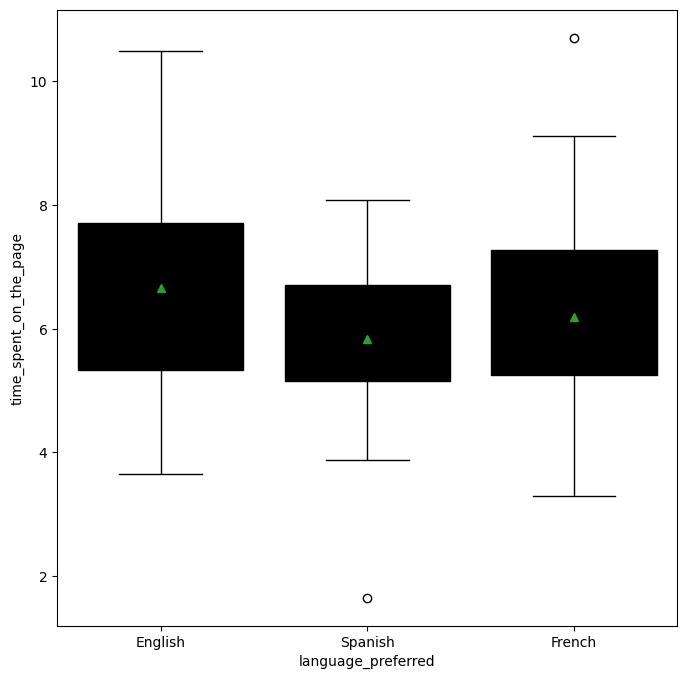

In [42]:
plt.figure(figsize=(8,8))
df_new = df[df['landing_page'] == 'new']
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new,color='k')
plt.show()

In [43]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [45]:
from scipy.stats import shapiro
w, p_value = shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)



The p-value is 0.8040040364746845


In [46]:
from scipy.stats import levene
statistic, p_value = levene( df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'])
print('The p-value is', p_value)



The p-value is 0.46711357711340173


In [47]:
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

In [ ]:
from scipy.stats import f_oneway
